In [1]:
import pandas as pd
dataset = pd.read_csv(r'C:\Users\gmaster\Desktop\Diploma\Training dataset\Labelled Dataset.csv') #Import Labelled Dataset

In [2]:
from pycaret.datasets import get_data

In [3]:
#Check the shape of data (rows,columns)
dataset.shape

(3791, 12)

In [4]:
#Split data for model build and data for predictions
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (3412, 12)
Unseen Data For Predictions: (379, 12)


In [5]:
from pycaret.classification import *
#Data set up & normalization
exp_mclf101 = setup(data = data, target = 'class', session_id=123,numeric_features = ['XSS Badwords','SQL Badwords','Command Injection Badords','spaces','braces','single_q','dashes','double_q'],ignore_features = ['method', 'path', 'body'])

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,"Legit: 0, SQL Injection: 1, XSS: 2, command injection: 3"
4,Original Data,"(3412, 12)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
#Compare classifiers based on imported dataset
best_classifier = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9992,0.9998,0.9984,0.9992,0.9992,0.9988,0.9988,0.2010
rf,Random Forest Classifier,0.9987,0.9998,0.9972,0.9988,0.9987,0.9982,0.9982,0.2020
lightgbm,Light Gradient Boosting Machine,0.9983,0.9993,0.9961,0.9983,0.9983,0.9976,0.9976,0.0530
ada,Ada Boost Classifier,0.9979,0.9990,0.9949,0.9979,0.9979,0.9970,0.9971,0.0380
gbc,Gradient Boosting Classifier,0.9975,0.9997,0.9937,0.9975,0.9975,0.9965,0.9965,0.1800
dt,Decision Tree Classifier,0.9971,0.9979,0.9941,0.9971,0.9971,0.9959,0.9959,0.0060
svm,SVM - Linear Kernel,0.9962,0.0000,0.9926,0.9963,0.9962,0.9947,0.9947,0.0280
knn,K Neighbors Classifier,0.9954,0.9985,0.9918,0.9955,0.9954,0.9935,0.9935,0.0560
lda,Linear Discriminant Analysis,0.9954,0.9990,0.9943,0.9955,0.9954,0.9935,0.9936,0.0070
lr,Logistic Regression,0.9950,0.9996,0.9881,0.9950,0.9949,0.9929,0.9929,0.4610


In [7]:
print(best_classifier)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [7]:
#Build Model
et_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9916,0.9977,0.9844,0.9917,0.9916,0.9882,0.9882
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [8]:
#Tune model
tuned_et_model = tune_model(et_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9916,0.9960,0.9844,0.9917,0.9916,0.9882,0.9882
2,0.9958,0.9987,0.9881,0.9959,0.9958,0.9941,0.9941
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9958,1.0000,0.9881,0.9959,0.9958,0.9941,0.9941
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9958,1.0000,0.9881,0.9959,0.9958,0.9941,0.9941
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9916,1.0000,0.9762,0.9917,0.9914,0.9881,0.9882


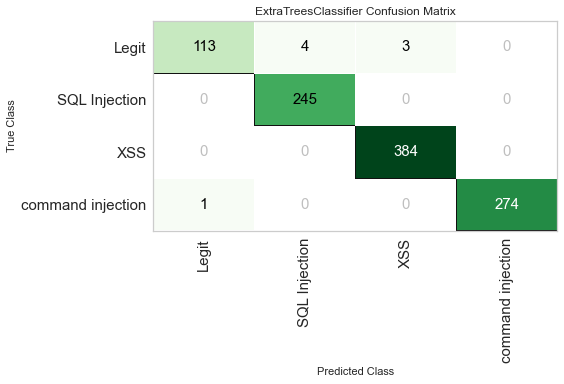

In [10]:
plot_model(tuned_et_model, plot = 'confusion_matrix')

In [9]:
evaluate_model(tuned_et_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
#Prediction phase
predict_model(tuned_et_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9922,0.9997,0.9845,0.9922,0.9921,0.9891,0.9891


,single_q,double_q,dashes,braces,spaces,SQL Badwords,XSS Badwords,Command Injection Badords,class,Label,Score
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,XSS,XSS,0.9846
1,1.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,SQL Injection,SQL Injection,1.0000
2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,command injection,command injection,0.9524
3,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,XSS,XSS,0.9787
4,0.0,1.0,0.0,0.0,4.0,2.0,0.0,0.0,SQL Injection,SQL Injection,1.0000
...,...,...,...,...,...,...,...,...,...,...,...
1019,1.0,0.0,0.0,1.0,4.0,3.0,0.0,1.0,SQL Injection,SQL Injection,0.9974
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Legit,Legit,0.9983
1021,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,XSS,XSS,0.9787
1022,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,XSS,XSS,0.9787


In [13]:
#Finalise model
final_et = finalize_model(tuned_et_model)

In [14]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head()

,method,path,body,single_q,double_q,dashes,braces,spaces,SQL Badwords,XSS Badwords,Command Injection Badords,class,Label,Score
0,GET,/index.jsp?content=personal_loans.htm,NaN,0,0,0,0,0,0,0,0,Legit,Legit,0.9977
1,GET,/index.jsp?content=personal_deposit.htm,NaN,0,0,0,0,0,0,0,0,Legit,Legit,0.9977
2,GET,/index.jsp?content=business_other.htm,NaN,0,0,0,0,0,0,0,0,Legit,Legit,0.9977
3,GET,/index.jsp,NaN,0,0,0,0,0,0,0,0,Legit,Legit,0.9977
4,GET,/index.jsp?content=business_insurance.htm,NaN,0,0,0,0,0,0,0,0,Legit,Legit,0.9977


In [16]:
unseen_predictions.to_csv(r'C:\Users\gmaster\Desktop\Diploma\Model Result\mlmodel_result_et.csv')